In [1]:
from platform import python_version
python_version()

'3.8.6'

In [2]:
!which python #conda environment: mlp

/cfs/home/ludo4644/.local-co/envs/scalableML/bin/python


In [3]:
import datetime
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

def standard_plot(w=10,h=4,fontsize=14):
    fig = plt.figure(figsize=(w,h))
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'font.size': fontsize})
    plt.rcParams['font.family'] = 'DejaVu Sans'
    #plt.rc('text', usetex=True)
    return plt.gca()

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding

2023-01-09 15:10:03.821431: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# NewsAPI

## EOD Historical Data
https://eodhistoricaldata.com/cp/settings 

In [29]:
import requests
import datetime

# Set the API endpoint and your API key
endpoint = "https://eodhistoricaldata.com/api/news"
api_key = "63b2efc1180c66.27144598"

# Set the ticker symbol
ticker = "TSLA.US" #TSLA
#search_for = 'strong buy' #'total revenue', etc, see: https://eodhistoricaldata.com/financial-apis/stock-market-financial-news-api/ 

# Calculate the date range for the last 2 years?
#today = datetime.datetime.today()
# last_year = today - datetime.timedelta(days=365)
# "from": last_year.strftime("%Y-%m-%d"), #'2022-12-01', 
# "to": today.strftime("%Y-%m-%d"), #'2022-12-31', 

In [51]:
def getNews(api_key,ticker,year,month):
  
    for start,end in zip([1,15],[16,monthrange(year, month)[1]]):
    
        from_date = '{}-{:02d}-{:02d}'.format(year,month,start)
        to_date = '{}-{:02d}-{:02d}'.format(year,month,end)
        
        print('Grabbing News data between {}-{}'.format(from_date,to_date))    
        
        # Set the parameters for the request
        params = {
            "api_token": api_key,
            "s": ticker,
            "from": from_date, 
            "to": to_date,
            "limit": 1000,
        }

        # Make the request to the API
        response = requests.get(endpoint, params=params)

        #Create a Pandas dataframe from the response
        news = pd.DataFrame(response.json())

        print('Number of articles: ',len(news.index))
        
        news.head(n=1000)

        # Print the response from the API
        #print(response.json())

        # Store the dataframe as a CSV file
        news.to_csv("data/news/tesla_from_{}_to_{}.csv".format(from_date,to_date))
    
#for year in range(2013,2023):
#    for month in range(1,13):
#        getNews(api_key,ticker,year,month)

from calendar import monthrange
for year in range(2013,2024):
    for month in range(1,13):
        getNews(api_key,ticker,year,month)
        if year == 2023 and month == 1:
            break

Grabbing News data between 2013-01-01-2013-01-16
Number of articles:  0
Grabbing News data between 2013-01-15-2013-01-31
Number of articles:  0
Grabbing News data between 2013-02-01-2013-02-16
Number of articles:  0
Grabbing News data between 2013-02-15-2013-02-28
Number of articles:  0
Grabbing News data between 2013-03-01-2013-03-16
Number of articles:  0
Grabbing News data between 2013-03-15-2013-03-31
Number of articles:  0
Grabbing News data between 2013-04-01-2013-04-16
Number of articles:  0
Grabbing News data between 2013-04-15-2013-04-30
Number of articles:  0
Grabbing News data between 2013-05-01-2013-05-16
Number of articles:  0
Grabbing News data between 2013-05-15-2013-05-31
Number of articles:  0
Grabbing News data between 2013-06-01-2013-06-16
Number of articles:  0
Grabbing News data between 2013-06-15-2013-06-30
Number of articles:  0
Grabbing News data between 2013-07-01-2013-07-16
Number of articles:  0
Grabbing News data between 2013-07-15-2013-07-31
Number of artic

Number of articles:  3
Grabbing News data between 2017-10-15-2017-10-31
Number of articles:  6
Grabbing News data between 2017-11-01-2017-11-16
Number of articles:  4
Grabbing News data between 2017-11-15-2017-11-30
Number of articles:  6
Grabbing News data between 2017-12-01-2017-12-16
Number of articles:  0
Grabbing News data between 2017-12-15-2017-12-31
Number of articles:  0
Grabbing News data between 2018-01-01-2018-01-16
Number of articles:  1
Grabbing News data between 2018-01-15-2018-01-31
Number of articles:  1
Grabbing News data between 2018-02-01-2018-02-16
Number of articles:  2
Grabbing News data between 2018-02-15-2018-02-28
Number of articles:  0
Grabbing News data between 2018-03-01-2018-03-16
Number of articles:  0
Grabbing News data between 2018-03-15-2018-03-31
Number of articles:  0
Grabbing News data between 2018-04-01-2018-04-16
Number of articles:  2
Grabbing News data between 2018-04-15-2018-04-30
Number of articles:  2
Grabbing News data between 2018-05-01-201

Number of articles:  562
Grabbing News data between 2022-07-01-2022-07-16
Number of articles:  525
Grabbing News data between 2022-07-15-2022-07-31
Number of articles:  534
Grabbing News data between 2022-08-01-2022-08-16
Number of articles:  449
Grabbing News data between 2022-08-15-2022-08-31
Number of articles:  425
Grabbing News data between 2022-09-01-2022-09-16
Number of articles:  322
Grabbing News data between 2022-09-15-2022-09-30
Number of articles:  320
Grabbing News data between 2022-10-01-2022-10-16
Number of articles:  433
Grabbing News data between 2022-10-15-2022-10-31
Number of articles:  456
Grabbing News data between 2022-11-01-2022-11-16
Number of articles:  407
Grabbing News data between 2022-11-15-2022-11-30
Number of articles:  422
Grabbing News data between 2022-12-01-2022-12-16
Number of articles:  467
Grabbing News data between 2022-12-15-2022-12-31
Number of articles:  606
Grabbing News data between 2023-01-01-2023-01-16
Number of articles:  126
Grabbing News

In [10]:
#Create a Pandas dataframe from the response
news = pd.DataFrame(response.json())

# Print the dataframe
news.head(n=1000)

,date,title,content,link,symbols,tags,sentiment
0,2023-01-04T12:06:58+00:00,Tesla stock is 'way oversold on fears of the u...,Tesla watcher and Twitter CEO Elon Musk critic...,https://finance.yahoo.com/news/tesla-stock-is-...,"[F.US, GM.US, NIO.US, NIOIF.US, TL0.F, TL0.XET...","[DAN IVES, ELON MUSK, TESLA, TESLA GIGAFACTORY...","{'polarity': -0.802, 'neg': 0.079, 'neu': 0.86..."
1,2023-01-04T11:45:29+00:00,Dow Jones Futures Rise With Key Data Due After...,Dow Jones futures: The market started 2023 whe...,https://finance.yahoo.com/m/a2700e4f-b62f-34a3...,"[AAPL.MX, AAPL.US, AAPL34.SA, APC.F, APC.XETRA...","[APPLE, BEAR MARKET, DOW JONES, STOCK MARKET]","{'polarity': 0.494, 'neg': 0, 'neu': 0.882, 'p..."
2,2023-01-04T11:29:29+00:00,Dow Jones Futures Rise After Market Hit Resist...,Dow Jones futures: The market started 2023 whe...,https://finance.yahoo.com/m/a2700e4f-b62f-34a3...,"[AAPL.US, COMP.US, DJI.INDX, GSPC.INDX, LLY.US...","[APPLE, BEAR MARKET, DOW JONES, STOCK MARKET, ...","{'polarity': 0.494, 'neg': 0, 'neu': 0.882, 'p..."
3,2023-01-04T11:25:26+00:00,Apple’s Stock Is Losing Its Shine After an Ugl...,(Bloomberg) -- Investors are no longer turning...,https://finance.yahoo.com/news/apple-stock-los...,"[AAPL.MX, AAPL.US, AAPL34.SA, APC.F, APC.XETRA...","[APPLE INC, BLOOMBERG, WORLD’S MOST VALUABLE C...","{'polarity': 0.803, 'neg': 0.077, 'neu': 0.841..."
4,2023-01-04T11:04:00+00:00,Rivian Misses 2022 Production Numbers. The Sto...,"Rivian produced 10,020 vehicles in the fourth ...",https://finance.yahoo.com/m/13ef27d0-2019-325b...,"[RIVN.US, TL0.F, TL0.XETRA, TSLA.MX, TSLA.US, ...","[COMPANY GUIDANCE, FOURTH QUARTER, RIVIAN AUTO...","{'polarity': -0.296, 'neg': 0.099, 'neu': 0.90..."
...,...,...,...,...,...,...,...
95,2023-01-02T20:00:00+00:00,"Tesla Delivers Record 405,278 Cars in Quarter ...",(Bloomberg) -- Tesla Inc. delivered fewer vehi...,https://finance.yahoo.com/news/tesla-delivers-...,"[TL0.F, TL0.XETRA, TSLA.MX, TSLA.US, TSLA34.SA]","[BLOOMBERG, ELON MUSK, TESLA, TESLA SHARES, TE...","{'polarity': -0.351, 'neg': 0.05, 'neu': 0.909..."
96,2023-01-02T19:54:26+00:00,Dow Jones Futures Loom For Stock Market 2023; ...,Dow Jones futures kick off the 2023 stock mark...,https://finance.yahoo.com/m/a04d1a21-dd04-37d8...,"[BM8.F, BMRN.US, CELH.US, COMP.US, DJI.INDX, G...","[BIOMARIN PHARMACEUTICAL, DOW JONES, LI AUTO, ...","{'polarity': -0.55, 'neg': 0.165, 'neu': 0.835..."
97,2023-01-02T19:39:00+00:00,Tesla delivery-target miss shows ‘demand crack...,As Tesla Inc. shares slumped to their worst pe...,https://finance.yahoo.com/m/4e9f8126-699a-3e49...,"[TL0.F, TL0.XETRA, TSLA.MX, TSLA.US, TSLA34.SA]","[TESLA, TESLA SHARES]","{'polarity': -0.44, 'neg': 0.131, 'neu': 0.799..."
98,2023-01-02T19:16:00+00:00,Cathie Wood Watch: Ark Snaps Up More Tesla Shares,Cathie Wood's flagship Ark Innovation ETF drop...,https://finance.yahoo.com/m/330cb46d-2927-3274...,"[TL0.F, TL0.XETRA, TSLA.MX, TSLA.US, TSLA34.SA]","[ARK INNOVATION ETF, CATHIE WOOD, TESLA, TESLA...","{'polarity': 0.459, 'neg': 0, 'neu': 0.826, 'p..."


In [141]:
# Store the dataframe as a CSV file
df.to_csv("data/tesla_dec2022.csv")

In [98]:
len(news.index)

1000

In [19]:
for i in range(0,20):
    print(news.iloc[i].title)
    #print(news.iloc[i].content)
    print(news.iloc[i].sentiment)

Tesla stock is 'way oversold on fears of the unknown,' Wedbush's Ives says
{'polarity': -0.802, 'neg': 0.079, 'neu': 0.863, 'pos': 0.059}
Dow Jones Futures Rise With Key Data Due After Market Hit Resistance To Start 2023
{'polarity': 0.494, 'neg': 0, 'neu': 0.882, 'pos': 0.118}
Dow Jones Futures Rise After Market Hit Resistance To Start 2023 As Apple, Tesla Dived
{'polarity': 0.494, 'neg': 0, 'neu': 0.882, 'pos': 0.118}
Apple’s Stock Is Losing Its Shine After an Ugly Month of December
{'polarity': 0.803, 'neg': 0.077, 'neu': 0.841, 'pos': 0.082}
Rivian Misses 2022 Production Numbers. The Stock Rises Anyway.
{'polarity': -0.296, 'neg': 0.099, 'neu': 0.901, 'pos': 0}
Cathie Wood Is Buying These Top Growth Stocks -- and Both Could Make You Rich Over Time
{'polarity': 0.557, 'neg': 0, 'neu': 0.902, 'pos': 0.098}
Tesla Stock Attempts Rebound After Tuesday Selloff
{'polarity': 0.681, 'neg': 0.024, 'neu': 0.837, 'pos': 0.139}
2 Stocks Down Over 60% to Buy Right Now
{'polarity': 0.436, 'neg': 

In [74]:
import pandas as pd
import glob

df = 0

# List the CSV files to merge
csv_files = glob.glob('data/news/tesla_*.csv')

# Read the CSV files into a list of dataframes
dataframes = [pd.read_csv(f) for f in csv_files]

# Merge the dataframes into a single dataframe
df = pd.concat(dataframes)

df = df.sort_values("date")

df.reset_index()

# Write the merged dataframe to a CSV file
df.to_csv("data/news/tesla_2013-2023.csv", index=False)

## Load full tesla_csv

In [5]:
# Load the news data
df = pd.read_csv("data/news/tesla_2013-2023.csv",usecols=['date','title','content','link','sentiment'])
df.head()

,date,title,content,link,sentiment
0,2015-07-16T17:35:00+00:00,Tesla Invites America to Join the Next Billion,"PALO ALTO, CA--(Marketwired - Jul 16, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.989, 'neg': 0.009, 'neu': 0.896..."
1,2015-07-16T17:35:00+00:00,Tesla Invites America to Join the Next Billion,"PALO ALTO, CA--(Marketwired - Jul 16, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.989, 'neg': 0.009, 'neu': 0.896..."
2,2015-07-22T11:04:00+00:00,Tesla Announces Release Date for Second Quarte...,"PALO ALTO, CA--(Marketwired - Jul 22, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.318, 'neg': 0, 'neu': 0.983, 'p..."
3,2015-08-05T20:43:00+00:00,Tesla Releases Second Quarter 2015 Financial R...,"PALO ALTO, CA--(Marketwired - Aug 5, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.318, 'neg': 0, 'neu': 0.981, 'p..."
4,2015-08-13T11:08:00+00:00,Tesla Announces $500 Million Common Stock Offe...,"PALO ALTO, CA--(Marketwired - Aug 13, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.989, 'neg': 0.018, 'neu': 0.885..."


In [6]:
# First of all: Remove NaNs
num_with_nan = len(df['sentiment'].index)
df = df[df['sentiment'].notna()]
df = df.reset_index()

In [211]:
import json

def expand_sentiment(df,extract_string='polarity'):
    
    num = len(df['sentiment'].index)
    print('Removed {} news articles for which sentiment score is missing'.format(num_with_nan-num))
    
    """
    # Debugging:
    sentiment_dict = []
    for i in range(0,num):
        try:
            sentiment_dict.append(json.loads(df['sentiment'][i].replace("'", '"')))
        except AttributeError:
            print(i)
    """
    
    sentiment_dict = [json.loads(df['sentiment'][i].replace("'", '"')) for i in range(0,num)]
    polarity = [s[extract_string] for s in sentiment_dict]

    return polarity
    
df['polarity'] = expand_sentiment(df)

#df['neg'] = expand_sentiment(df,extract_string='neg')
#df['neu'] = expand_sentiment(df,extract_string='neu')
#df['pos'] = expand_sentiment(df,extract_string='pos')

try:
    df = df.drop(columns='index')
except:
    pass

Removed 21 news articles for which sentiment score is missing


In [213]:
def remove_duplicates(df,p=False):
    # Keep the first occurrence of each set of duplicates
    
    if p:
        print(len(df.index))
    df = df.drop_duplicates(keep='first')
    if p:
        print(len(df.index))
    return df
    
df = remove_duplicates(df)

df.head()

,date,title,content,link,sentiment,polarity
0,2015-07-16T17:35:00+00:00,Tesla Invites America to Join the Next Billion,"PALO ALTO, CA--(Marketwired - Jul 16, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.989, 'neg': 0.009, 'neu': 0.896...",0.989
2,2015-07-22T11:04:00+00:00,Tesla Announces Release Date for Second Quarte...,"PALO ALTO, CA--(Marketwired - Jul 22, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.318, 'neg': 0, 'neu': 0.983, 'p...",0.318
3,2015-08-05T20:43:00+00:00,Tesla Releases Second Quarter 2015 Financial R...,"PALO ALTO, CA--(Marketwired - Aug 5, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.318, 'neg': 0, 'neu': 0.981, 'p...",0.318
4,2015-08-13T11:08:00+00:00,Tesla Announces $500 Million Common Stock Offe...,"PALO ALTO, CA--(Marketwired - Aug 13, 2015) - ...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.989, 'neg': 0.018, 'neu': 0.885...",0.989
5,2015-08-31T13:30:00+00:00,"U.S. Rare Earth Minerals, Inc. Denies Knowledg...","LAS VEGAS, Aug. 31, 2015 (GLOBE NEWSWIRE) -- U...",https://www.globenewswire.com/news-release/201...,"{'polarity': 0.898, 'neg': 0.043, 'neu': 0.884...",0.898


In [191]:
"""
# Select the first and second rows
row1 = df.iloc[0]
row2 = df.iloc[1]

print(row1.title==row2.title)

# Check which columns differ between the two rows
diff = row1.ne(row2)

# Print the differences as True/False for each column
print(diff)
"""

'\n# Select the first and second rows\nrow1 = df.iloc[0]\nrow2 = df.iloc[1]\n\nprint(row1.title==row2.title)\n\n# Check which columns differ between the two rows\ndiff = row1.ne(row2)\n\n# Print the differences as True/False for each column\nprint(diff)\n'

In [214]:
def exponential_moving_average(df, window):
    df[f'exp_mean_{window}_days'] = df.polarity.ewm(span = window).mean()
    return df

def pre_process_news(df):

    df_temp = df.copy()

    # Set the index to the datetime column
    df_temp['date'] = pd.to_datetime(df_temp['date']).dt.strftime('%Y-%m-%d')
    
    # Get rid off some columns and set date to index
    df_temp = df_temp.drop(columns=['title','content','link','sentiment'])
    df_temp = df_temp.set_index("date")
    df_temp.index = pd.to_datetime(df_temp.index)

    # Resample by taking mean over news segments:
    df_temp = df_temp.resample('1d').mean()
    
    # Fill all NaN-values with zeros
    df_temp = df_temp.fillna(0)
    
    # Exponential moving average for last 7 days
    df_temp = exponential_moving_average(df_temp, window=7)

    return df_temp

df_temp = pre_process_news(df)
print(df_temp)

            polarity  exp_mean_7_days
date                                 
2015-07-16  0.989000         0.989000
2015-07-17  0.000000         0.423857
2015-07-18  0.000000         0.240568
2015-07-19  0.000000         0.152589
2015-07-20  0.000000         0.102572
...              ...              ...
2022-12-31  0.743250         0.372782
2023-01-01 -0.000875         0.279368
2023-01-02  0.092346         0.232613
2023-01-03  0.172892         0.217682
2023-01-04  0.047833         0.175220

[2730 rows x 2 columns]


In [225]:
# Check that it's working:
print(df.tail(n=18)['polarity'].mean())
df_temp.tail(n=2)

0.047833333333333346


,polarity,exp_mean_7_days
date,,
2023-01-03,0.172892,0.217682
2023-01-04,0.047833,0.175220


In [278]:
df_temp.to_csv("data/news/training_data_exp_mean_7_days.csv")

<AxesSubplot: xlabel='date'>

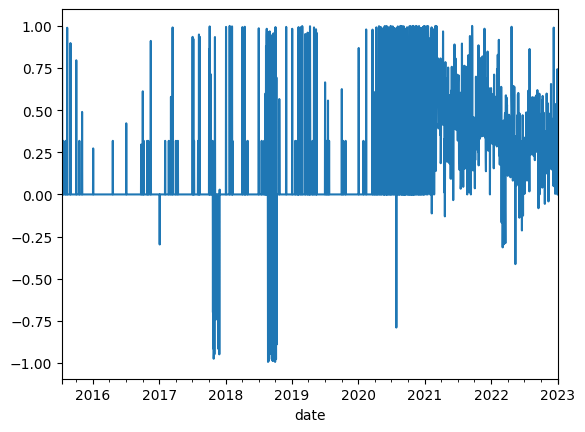

In [215]:
df_temp.polarity.plot()

<AxesSubplot: xlabel='date'>

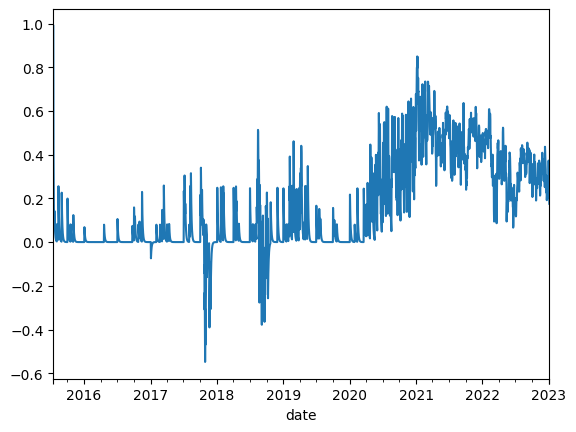

In [216]:
df_temp.exp_mean_7_days.plot()

# News Sentiment
https://arxiv.org/pdf/1801.07055.pdf \
In this data set, the process to obtain these sentiment scores was carried out by
applying the framework of the qdap R package [20] with default parametrization.

## Getting news

data/Facebook_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,-1,-1,7,...,13,13,13,13,13,13,13,13,13,13
1,2,-1,-1,-1,-1,-1,-1,-1,-1,3,...,42,42,42,42,42,42,42,42,42,42
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,98,98,98,98,98,98,98,98,98,98
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,7,7,7,7,7,7,7,7,7
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,34,34,34,34,34,34,34,34,34,34


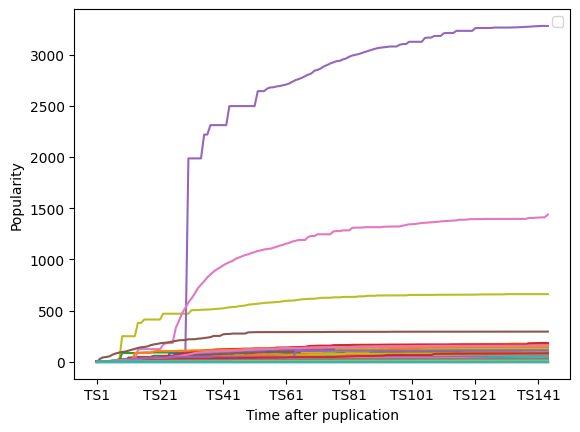

data/GooglePlus_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,23,23,23,23,23,23,23,23,23,23
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


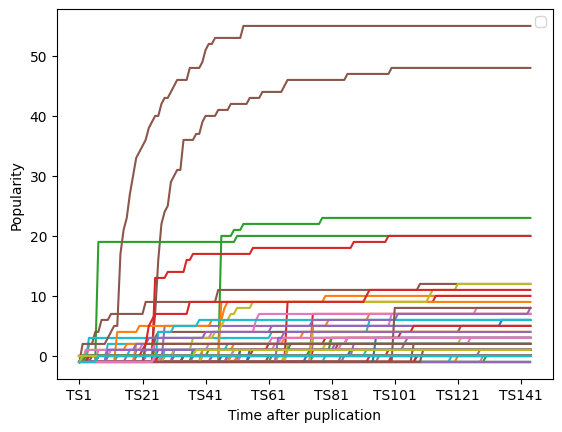

data/LinkedIn_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,10,10,10,10,10,10,10,10,10,10
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


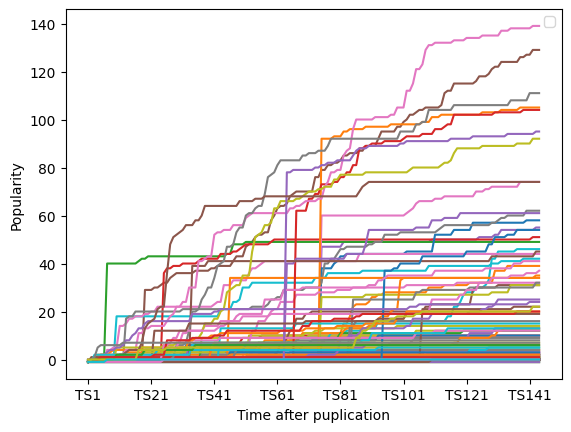

In [7]:
# Probably don't need this data!!!

df_v = {}

for social_media_response in ["data/Facebook_Economy.csv",
                              "data/GooglePlus_Economy.csv",
                              "data/LinkedIn_Economy.csv"]:
    
    # Extract
    df = pd.read_csv(social_media_response)
    
    # Print
    print(social_media_response+':')
    display(df.iloc[:5,:])
    print()  # Add a blank line after each dataframe
    
    # Save
    df_v[social_media_response] = df
    
    # Plotting
    how_many = 200

    #Splice
    df = df.iloc[:how_many, :]

    # Transpose the dataframe and plot the resulting columns
    ax = df.iloc[:how_many, 1:].T.plot(kind='line')
    ax.legend([])
    ax.set_ylabel('Popularity')
    ax.set_xlabel('Time after puplication')

    # Show the plot
    plt.show()

In [8]:

# Load the news data
df = pd.read_csv("data/News_Final.csv")

# Only use economy news
news = df[df['Topic'] == 'economy']
news = news.reset_index(drop=True)

# Drop columns we don't need 
news = news.drop(columns='Topic')
news = news.drop(columns='PublishDate')
news = news.drop(columns='Facebook')
news = news.drop(columns='GooglePlus')
news = news.drop(columns='LinkedIn')

news.head(n=20)

,IDLink,Title,Headline,Source,SentimentTitle,SentimentHeadline
0,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,0.208333,-0.156386
1,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,-0.425210,0.139754
2,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,0.000000,0.026064
3,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,0.000000,0.141084
4,27838.0,Greek economy grows 0.1 pct q/q in fourth quarter,Greece's economy expanded by 0.1 percent in la...,Reuters via Yahoo! Finance,0.000000,-0.375259
5,27811.0,Big data and the Internet of Things to add £32...,Big data analytics and the Internet of Things ...,Information Age,0.063205,0.038986
6,27826.0,Greek economy shrank 0.3 percent last year but...,Greece's economy expanded slightly in the last...,Reuters via Yahoo! Finance,-0.085645,-0.099531
7,27839.0,Sweden's economy is on fire — but here's why t...,"Sweden's economy is on a massive tear, but for...",Business Insider UK Finance via Yahoo Canada F...,0.000000,-0.014174
8,27837.0,Greek economy shrank 0.3 percent last year but...,By George Georgiopoulos ATHENS (Reuters) - Gre...,Reuters via Yahoo! Finance,-0.085645,-0.120476
9,27853.0,China cuts reserve requirements in bid to boos...,China's central bank on Monday cut the proport...,AFP via Yahoo! India News,0.291667,0.094658


33928


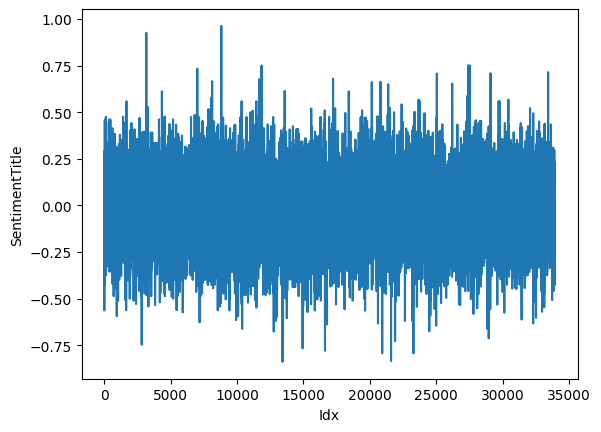

In [9]:
print(len(news['SentimentTitle']))
news['SentimentTitle'].plot()
plt.ylabel('SentimentTitle')
plt.xlabel('Idx')
plt.show()

In [10]:
# Find the maximum value and corresponding index 
max_value = news['SentimentTitle'].max()
max_index = news['SentimentTitle'].idxmax()

# Find the minimum value and corresponding index 
min_value = news['SentimentTitle'].min()
min_index = news['SentimentTitle'].idxmin()

# Print the results
print("Maximum value:", max_value)
print(news.iloc[max_index,:].Title)
print('Headline score:',news['SentimentHeadline'][max_index])
print(news.iloc[max_index,:].Headline)


print("\nMinimum value:", min_value)
print(news.iloc[min_index,:].Title)
print('Headline score:',news['SentimentHeadline'][min_index])
print(news.iloc[min_index,:].Headline)

Maximum value: 0.962353560852284
We just got some really great news about the economy
Headline score: -0.0108601257321392
The US economy created new jobs at an unexpectedly strong pace in December. There was a net increase of 292,000 jobs in the month,

Minimum value: -0.838525491562421
Improving economy not helping all
Headline score: -0.234129611399034
"""What's important to metro area economies is not just jobs,""" said Richard Shearer, a senior research analyst at the Brookings Institution.


## Use a RNN to map headlines to sentiment score

In [127]:
# Select the 'Title' column
titles = news['Title']
labels = news['SentimentTitle']

# Convert the column to a list
titles = titles.tolist()
labels = labels.tolist()

# Print the list
training_length = len(titles)
print(training_length)
print(len(labels))

33928
33928


In [128]:
def text2paddedseq(titles):

    # Tokenize the news headlines
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(titles)
    sequences = tokenizer.texts_to_sequences(titles)

    # Pad the sequences to the same length
    max_length = max([len(seq) for seq in sequences])
    print('max_length: ',max_length)
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    
    # Get the size of the vocabulary
    vocab_size = len(tokenizer.word_index) + 1  # +1 to account for 0 padding
    print('vocab_size: ',vocab_size)  # Outputs the number of unique tokens in the data
    
    return max_length, vocab_size, padded_sequences

In [129]:
max_length, vocab_size, padded_sequences = text2paddedseq(titles)

max_length:  25
vocab_size:  19569


In [15]:
"""
# Load in embeddings
glove_vectors = '/home/ubuntu/.keras/datasets/glove.6B.100d.txt'
glove = np.loadtxt(glove_vectors, dtype='str', comments=None)

# Extract the vectors and words
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]

# Create lookup of words to vectors
word_lookup = {word: vector for word, vector in zip(words, vectors)}

# New matrix to hold word embeddings
embedding_matrix = np.zeros((num_words, vectors.shape[1]))

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector
"""

"\n# Load in embeddings\nglove_vectors = '/home/ubuntu/.keras/datasets/glove.6B.100d.txt'\nglove = np.loadtxt(glove_vectors, dtype='str', comments=None)\n\n# Extract the vectors and words\nvectors = glove[:, 1:].astype('float')\nwords = glove[:, 0]\n\n# Create lookup of words to vectors\nword_lookup = {word: vector for word, vector in zip(words, vectors)}\n\n# New matrix to hold word embeddings\nembedding_matrix = np.zeros((num_words, vectors.shape[1]))\n\nfor i, word in enumerate(word_idx.keys()):\n    # Look up the word embedding\n    vector = word_lookup.get(word, None)\n\n    # Record in matrix\n    if vector is not None:\n        embedding_matrix[i + 1, :] = vector\n"

In [50]:
X = np.array(padded_sequences)
y = np.array(labels)
print(np.shape(X),np.shape(y))

(33928, 25) (33928,)


In [90]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Split the data into training, validation, and test sets
titles_train, titles_test, _, y_temp = train_test_split(titles, y, test_size=0.2, random_state=42)
titles_val, titles_test, _, _ = train_test_split(titles_test, y_temp, test_size=0.5, random_state=42)

print(np.shape(X_train),np.shape(X_val),np.shape(X_test))
print(np.shape(titles_train),np.shape(titles_val),np.shape(titles_test))

(27142, 25) (3393, 25) (3393, 25)
(27142,) (3393,) (3393,)


In [79]:
# Different models
version = 1

if version == 1:
    model = Sequential()

    # Embedding layer
    model.add(
        Embedding(input_dim=vocab_size,
                  input_length=max_length,
                  output_dim=100,
                  #weights=[embedding_matrix],
                  trainable=True,
                  mask_zero=True))

    # Masking layer for pre-trained embeddings
    model.add(Masking(mask_value=0.0))

    # Recurrent layer
    model.add(LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Dropout for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='linear'))

elif version == 2:
    model = Sequential()
    
    # Embedding layer
    model.add(
        Embedding(input_dim=vocab_size,
                  input_length=max_length,
                  output_dim=100,
                  #weights=[embedding_matrix],
                  trainable=True,
                  mask_zero=True))
    
    model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
    model.add(keras.layers.SimpleRNN(20))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [80]:
# Early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

cp = [es]

In [82]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=256, 
                    validation_data=(X_val, y_val),
                    callbacks=cp,
                    verbose=1)

Epoch 1/50
107/107 [==============================] - 9s 85ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 2/50
107/107 [==============================] - 9s 82ms/step - loss: 0.0054 - val_loss: 0.0069
Epoch 3/50
107/107 [==============================] - 9s 82ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 4/50
107/107 [==============================] - 9s 81ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 5/50
107/107 [==============================] - 8s 79ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 6/50
107/107 [==============================] - 9s 80ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 7/50
107/107 [==============================] - 9s 80ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 8/50
107/107 [==============================] - 9s 80ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 9/50
107/107 [==============================] - 9s 82ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 10/50
107/107 [==============================] - 9s 83ms/step - loss: 0.0022 - val_lo

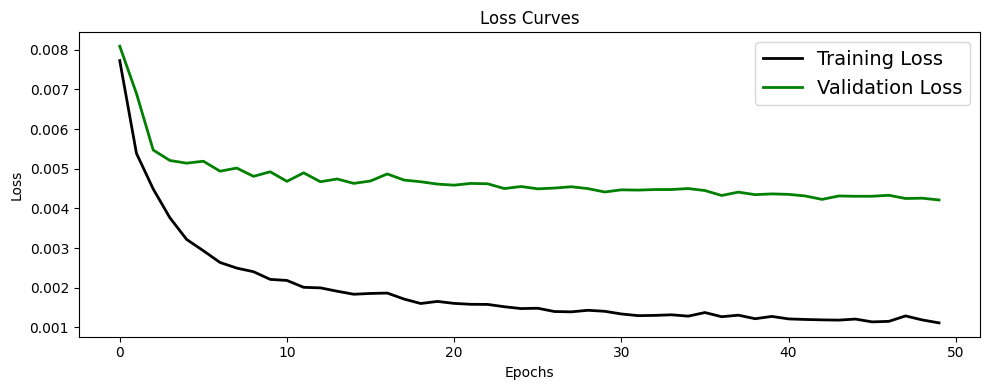

In [83]:
# Loss & Accuracycurve
standard_plot(fontsize=10)

plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

plt.tight_layout()
plt.show()


training data

Num of predicted (true) positives: 247 (212) 

Examples:
    Score 0.082 (true: 0.083): Trudeau Obama to link economy, environment at state dinner
    Score 0.121 (true: 0.094): Transportation infrastructure, economy and education top BRAC's ...
    Score -0.253 (true: -0.247): CBJ Afternoon Buzz: Economy shows growth; Consumers drop ...
    Score -0.100 (true: -0.083): CAP payments critical to N Irish economy - Phil Hogan
    Score -0.174 (true: -0.168): As China's Economy Slows, Ford Is Continuing to Find Growth
    Score -0.283 (true: -0.277): Brazilian Economy in the Throes of Recession as Zika Outbreak ...
    Score -0.225 (true: -0.219): Hillary Clinton Poses A Threat To The Gig Economy
    Score -0.075 (true: -0.073): Poor economy clipping the wings of Alberta's winter travellers
    Score 0.181 (true: 0.177): Bill Maher Rips Republicans Over California's Booming Economy
    Score 0.036 (true: 0.036): South Africa says committed to reducing constraints on economy

/tmp/ipykernel_14387/359732712.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,count)


Num of predicted (true) positives: 215 (174) 

Examples:
    Score 0.004 (true: 0.000): The Global Economy Confronts Four Geopolitical Risks
    Score -0.150 (true: -0.013): Nursultan Nazarbayev: bettering business in a rough economy
    Score -0.001 (true: 0.000): South Korea's economy grows at 2.7%
    Score 0.112 (true: 0.105): Why Uber Personifies the Best of the On-Demand Economy
    Score 0.046 (true: -0.061): India's black economy shrinking, still exceeds Thailand and ...
    Score -0.125 (true: -0.140): Adjusting to a new normal in global economy
    Score 0.175 (true: 0.176): In China, role of gov't and needs of market economy still clash
    Score 0.140 (true: 0.159): Russia is ready to consider Slovakia's interest in gas transit revenues
    Score -0.190 (true: -0.208): Economy slowdown in Indonesia gives reprieve to death row convicts
    Score -0.053 (true: 0.000): Scotland's private sector economy contracts


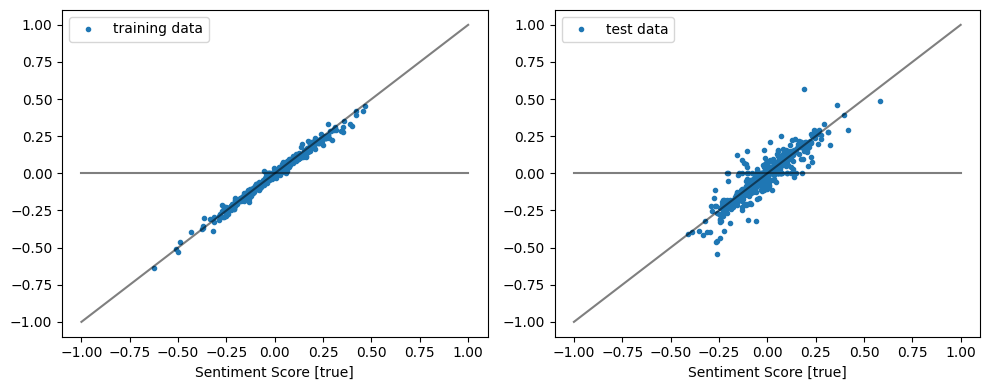

In [115]:
def count_positives(numbers):
    count = 0
    for number in numbers:
        if number > 0:
            count += 1
    return count

def predict(X_v,y_v,news_titles,num=100):
    
    standard_plot(fontsize=10)
    count = 1
    legend = ['training data','test data']
    
    for X,y,news_title,leg in zip(X_v,y_v,news_titles,legend):
        print('\n{}\n'.format(leg))
        plt.subplot(1,2,count)
        count += 1
        
        if len(X) > num:
            X,y = X[:num],y[:num]
    
        y_pred = model.predict(X)
        print('Num of predicted (true) positives: {} ({}) \n'.format(count_positives(y_pred),count_positives(y)))

        plt.plot(y_pred,y,'.')
        
        print('Examples:')
        for i in range(0,10):
            print('    Score {:.3f} (true: {:.3f}): {}'.format(y_pred[i][0],y[i],news_title[i]))
    
        plt.plot([-1,1],[-1,1],'-',c='k',alpha=0.5)
        plt.plot([-1,1],[0,0],'-',c='k',alpha=0.5)

        plt.legend([leg])
        plt.xlabel('Sentiment Score [true]')
        if count == 1:
            plt.ylabel('Sentiment Score [pred]')
    
    plt.tight_layout()
    plt.show()
        
predict([X_train,X_test],[y_train,y_test],[titles_train,titles_test],num=500)

## Test the trained network:

In [130]:
# Input
titles = [a['title'] for a in articles['articles']]

In [131]:
print(titles)

['Tesla’s latest update adds Steam games and Apple Music', 'Tesla accused of illegally firing two employees after they criticized Elon Musk', 'Elon Musk isn’t serious about giving power to a new CEO', 'The EV revolution became an eventuality in 2022', 'Tesla shares are down 70% for the year as Morgan Stanley cuts price target', "The truth about 'medbeds' - a miracle cure that doesn't exist", 'Electric vehicles confront the leap to the mass market - Reuters', 'Elon Musk: Only blue tick users to vote in Twitter polls on policy', 'Tesla suspends production at Shanghai plant - Reuters', 'Ford F-150 Lightning prices are going up again', 'Hands-On With the Apple Music App for Tesla', "Elon Musk is on the verge of losing his world's richest person title", "Elon Musk says we're 'overdue' for a recession, won't sell any more Tesla stock for 18-24 months: 'I need to sell some stock to make sure there was powder dry to account for a worst-case scenario'", 'Tesla Delivers Its First Electric Semi T

In [132]:
print(np.shape(titles))

(100,)


In [133]:
max_length, vocab_size, padded_sequences = text2paddedseq(titles)

max_length:  38
vocab_size:  731


In [134]:
y_pred = model.predict(padded_sequences)

In [136]:
print('Examples:')
for i in range(0,10):
    print('    Score {:.3f}: {}'.format(y_pred[i][0],titles[i]))

Examples:
    Score -0.056: Tesla’s latest update adds Steam games and Apple Music
    Score -0.065: Tesla accused of illegally firing two employees after they criticized Elon Musk
    Score 0.162: Elon Musk isn’t serious about giving power to a new CEO
    Score -0.014: The EV revolution became an eventuality in 2022
    Score 0.004: Tesla shares are down 70% for the year as Morgan Stanley cuts price target
    Score 0.100: The truth about 'medbeds' - a miracle cure that doesn't exist
    Score -0.193: Electric vehicles confront the leap to the mass market - Reuters
    Score -0.068: Elon Musk: Only blue tick users to vote in Twitter polls on policy
    Score -0.080: Tesla suspends production at Shanghai plant - Reuters
    Score -0.018: Ford F-150 Lightning prices are going up again


# Import stock market prices

In [9]:
import yfinance as yf
import datetime

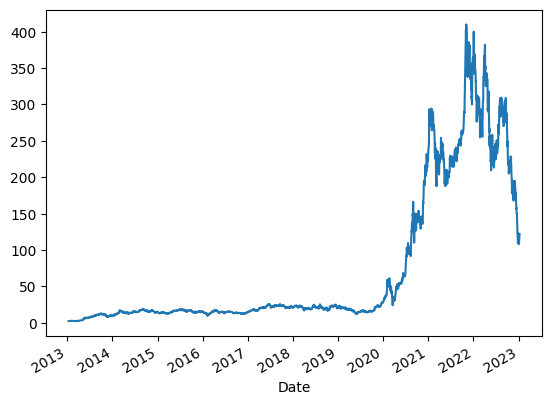

In [132]:
# Get the current date and the date one month ago
today = datetime.datetime.today()
one_month_ago = today - datetime.timedelta(days=365*10)

# Get the TSLA stock data from yfinance
tsla = yf.Ticker("TSLA") #VEFAB.ST
# info = tsla.info

# get historical market data
data = tsla.history(start=one_month_ago, end=today)

data = data.drop(columns=['Dividends','Stock Splits'])

data['Close'].plot()
plt.show()

[-0.00251148 -0.07847274 -0.12568307 ...  0.05124885 -0.0290391
  0.02465109]


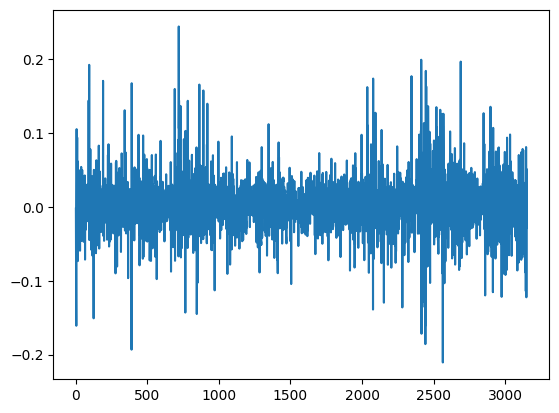

In [11]:
# Maybe later:

P_close = np.array(hist['Close'])
ratio = (P_close[1:]-P_close[:-1])/P_close[:-1]
print(ratio)

plt.plot(ratio)

In [100]:
df_news = pd.read_csv("data/news/training_data_exp_mean_7_days.csv")
print(np.shape(df_news))
df_news.head(n=10)

(2730, 3)


,date,polarity,exp_mean_7_days
0,2015-07-16,0.989,0.989000
1,2015-07-17,0.000,0.423857
2,2015-07-18,0.000,0.240568
3,2015-07-19,0.000,0.152589
4,2015-07-20,0.000,0.102572
5,2015-07-21,0.000,0.071377
6,2015-07-22,0.318,0.142531
7,2015-07-23,0.000,0.102934
8,2015-07-24,0.000,0.075111
9,2015-07-25,0.000,0.055213


In [83]:
"""
from pandas.tseries.offsets import BDay

isBusinessDay = BDay().onOffset

isBusinessDay = pd.to_datetime(df_news['date']).map(isBusinessDay)
df_news = df_news[isBusinessDay]

print(np.shape(df_news))
df_news.head(n=10)
"""

"\nfrom pandas.tseries.offsets import BDay\n\nisBusinessDay = BDay().onOffset\n\nisBusinessDay = pd.to_datetime(df_news['date']).map(isBusinessDay)\ndf_news = df_news[isBusinessDay]\n\nprint(np.shape(df_news))\ndf_news.head(n=10)\n"

In [122]:
import pandas_market_calendars as mcal

def extract_business_day(start_date = '2015-07-16',end_date = '2023-01-04'):
    """
    Given a start_date and end_date, returns:
    
    is_open: boolean list
    
    e.g is_open = [1,0,...,1] means that start_date = open, day after start_date = closed, and end_date = open
    """
    
    # Get the NYSE calendar
    cal = mcal.get_calendar('NYSE')

    # Get the NYSE calendar's open and close times for the specified period
    schedule = cal.schedule(start_date=start_date, end_date=end_date)
    
    # Only need a list of dates when it's open (not open and close times)
    isBusinessDay = np.array(schedule.market_open.dt.strftime('%Y-%m-%d')) 
    
    # Create boolean array for days being open (1) and closed (0) 
    is_open = np.zeros_like(df_news.index)
    delta = datetime.timedelta(days=1)
    start_date = datetime.datetime.strptime(start_date,"%Y-%m-%d") #datetime.date(2015, 7, 16)
    end_date = datetime.datetime.strptime(end_date,"%Y-%m-%d") #datetime.date(2023, 1, 4)
    
    # iterate over range of dates
    current_BusinessDay = isBusinessDay[0]
    count_dates = 0
    next_BusinessDay = 0
    
    while (start_date <= end_date):
    
        if start_date.strftime('%Y-%m-%d') == current_BusinessDay:
            is_open[count_dates] = True

            if current_BusinessDay == "2023-01-04":
                break
            else:
                next_BusinessDay += 1
                current_BusinessDay = isBusinessDay[next_BusinessDay]
        else:
            is_open[count_dates] = False

        count_dates += 1   
        start_date += delta
        
    return is_open

In [130]:
# Get a boolean array of all business days
is_open = extract_business_day()

# Invert the mask to be able to drop all non-buisiness days
is_open = [not i for i in is_open]

# Use the mask to filter the rows of the DataFrame
filtered_df = df_news.drop(df_news[is_open].index)
print(np.shape(filtered_df))
filtered_df.tail(n=10)

(1882, 3)


,date,polarity,exp_mean_7_days
2714,2022-12-20,0.232184,0.230143
2715,2022-12-21,0.076628,0.191764
2716,2022-12-22,0.258128,0.208355
2717,2022-12-23,0.163208,0.197068
2721,2022-12-27,0.274038,0.248735
2722,2022-12-28,0.088167,0.208593
2723,2022-12-29,0.299963,0.231436
2724,2022-12-30,0.302865,0.249293
2728,2023-01-03,0.172892,0.217682
2729,2023-01-04,0.047833,0.175220


In [139]:
tesla_df = data.iloc[631:-2]
tesla_df.index = tesla_df.index.strftime('%Y-%m-%d')
print(np.shape(tesla_df))
tesla_df.tail(n=10)

(1883, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2022-12-21,139.339996,141.259995,135.889999,137.570007,145417400
2022-12-22,136.000000,136.630005,122.260002,125.349998,210090300
2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,157304500
2023-01-03,118.470001,118.800003,104.639999,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,180389000


In [140]:
tesla_df['date'] = tesla_df.index
tesla_df.head()

/tmp/ipykernel_28723/2225204035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_df['date'] = tesla_df.index


,Open,High,Low,Close,Volume,date
Date,,,,,,
2015-07-16,17.614668,17.813334,17.544001,17.778667,24240000,2015-07-16
2015-07-17,18.166668,18.369333,17.883333,18.310667,75061500,2015-07-17
2015-07-20,18.333332,19.110001,18.169333,18.817333,74677500,2015-07-20
2015-07-21,18.003332,18.233334,17.770000,17.784666,91630500,2015-07-21
2015-07-22,17.417999,17.962667,17.390667,17.858000,46575000,2015-07-22


In [142]:
merged_df = pd.merge(filtered_df, tesla_df, on='date')
merged_df = merged_df.drop(columns=['polarity','Open','High','Low','Volume'])
merged_df.head()

,date,exp_mean_7_days,Close
0,2015-07-16,0.989000,17.778667
1,2015-07-17,0.423857,18.310667
2,2015-07-20,0.102572,18.817333
3,2015-07-21,0.071377,17.784666
4,2015-07-22,0.142531,17.858000


# Training session

In [192]:
#tesla_stock = np.expand_dims(data['Close'],axis=-1) 
tesla_stock = merged_df[['exp_mean_7_days','Close']].to_numpy()
print(tesla_stock)

[[9.89000000e-01 1.77786674e+01]
 [4.23857143e-01 1.83106670e+01]
 [1.02572343e-01 1.88173332e+01]
 ...
 [2.49293055e-01 1.23180000e+02]
 [2.17682359e-01 1.08099998e+02]
 [1.75220103e-01 1.13639999e+02]]


In [193]:
from sklearn.preprocessing import MinMaxScaler

# Normalise features
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(tesla_stock)

X,y = [],[]
timelag = 7 #days
input_dim = 1

for i in range(timelag,(len(training_set_scaled)-1)):
    X.append(training_set_scaled[i-timelag:i])
    y.append(training_set_scaled[i+1,1])
    
x_train = np.array(X)
y_train = np.array(y)

In [180]:
help(sc)

Help on MinMaxScaler in module sklearn.preprocessing._data object:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : 

In [194]:
print(np.shape(x_train))
print(np.shape(y_train))

(1874, 7, 2)
(1874,)


In [195]:
# Different models
version = 1

def create_model(LSTM_filters=64,dropout=0.1,recurrent_dropout=0.1,dense_dropout=0.5,activation='relu',depth=1):

    model = Sequential()

    # Recurrent layer
    model.add(LSTM(LSTM_filters, return_sequences=False, dropout=dropout, recurrent_dropout=recurrent_dropout, input_shape=(timelag, 2)))

    if depth>1:
        for i in range(1,depth):
            # Recurrent layer
            model.add(LSTM(LSTM_filters, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout))

    # Fully connected layer
    if activation=='relu':
        model.add(Dense(LSTM_filters, activation='relu'))
    elif activation=='leaky_relu':
        model.add(Dense(LSTM_filters))
        model.add(keras.layers.LeakyReLU(alpha=0.01))

    # Dropout for regularization
    model.add(Dropout(dense_dropout))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    
    return model

model = create_model(activation='leaky_relu')

In [196]:
# Early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

cp = [es]

In [197]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=30, 
                    batch_size=256, 
                    #validation_data=(X_val, y_val),
                    callbacks=cp,
                    verbose=1)

Epoch 1/30
8/8 [==============================] - 3s 79ms/step - loss: 0.1277
Epoch 2/30
8/8 [==============================] - 1s 79ms/step - loss: 0.0529
Epoch 3/30
8/8 [==============================] - 0s 62ms/step - loss: 0.0318
Epoch 4/30
8/8 [==============================] - 1s 73ms/step - loss: 0.0173
Epoch 5/30
8/8 [==============================] - 1s 78ms/step - loss: 0.0097
Epoch 6/30
8/8 [==============================] - 1s 70ms/step - loss: 0.0095
Epoch 7/30
8/8 [==============================] - 1s 79ms/step - loss: 0.0093
Epoch 8/30
8/8 [==============================] - 1s 63ms/step - loss: 0.0081
Epoch 9/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0080
Epoch 10/30
8/8 [==============================] - 0s 20ms/step - loss: 0.0077
Epoch 11/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0080
Epoch 12/30
8/8 [==============================] - 0s 19ms/step - loss: 0.0073
Epoch 13/30
8/8 [==============================] - 0s 18ms/st

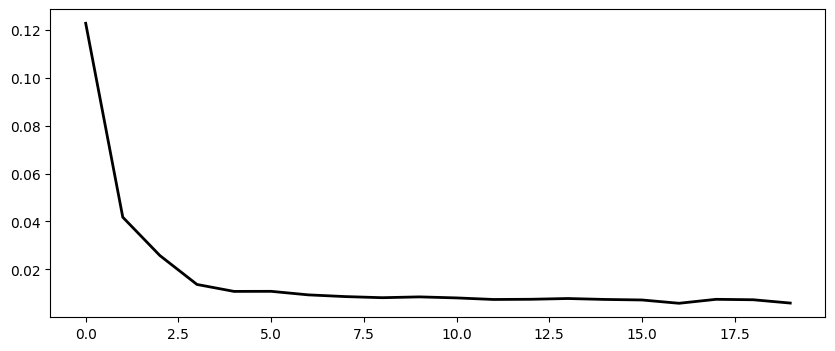

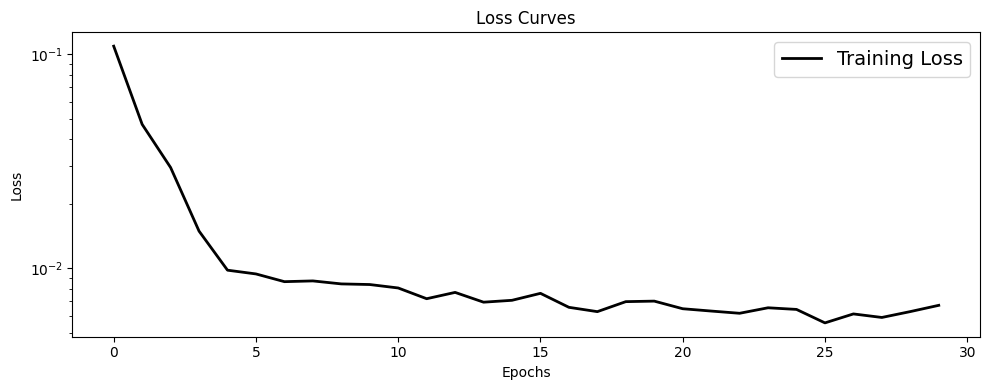

In [198]:
# Loss & Accuracycurve
standard_plot(fontsize=10)

plt.plot(history.history['loss'], 'black', linewidth=2.0)
#plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

plt.yscale('log')
plt.tight_layout()
plt.show()

In [199]:
# Predict values from test data trained using training data
y_hat = model.predict(x_train)

# inverse transform:
#y_hat = sc.inverse_transform(y_hat)
y_hat = y_hat*(sc.data_max_[1]-sc.data_min_[1])+sc.data_min_[1] # 1 for the 'Close' column
print(sc.data_min_)
print(sc.data_max_)

#y_train = sc.inverse_transform(y_train)
y_train = y_train*(sc.data_max_[1]-sc.data_min_[1])+sc.data_min_[1]
print(np.shape(y_hat))

[-0.46857687  9.57800007]
[  0.989      409.97000122]
(1874, 1)


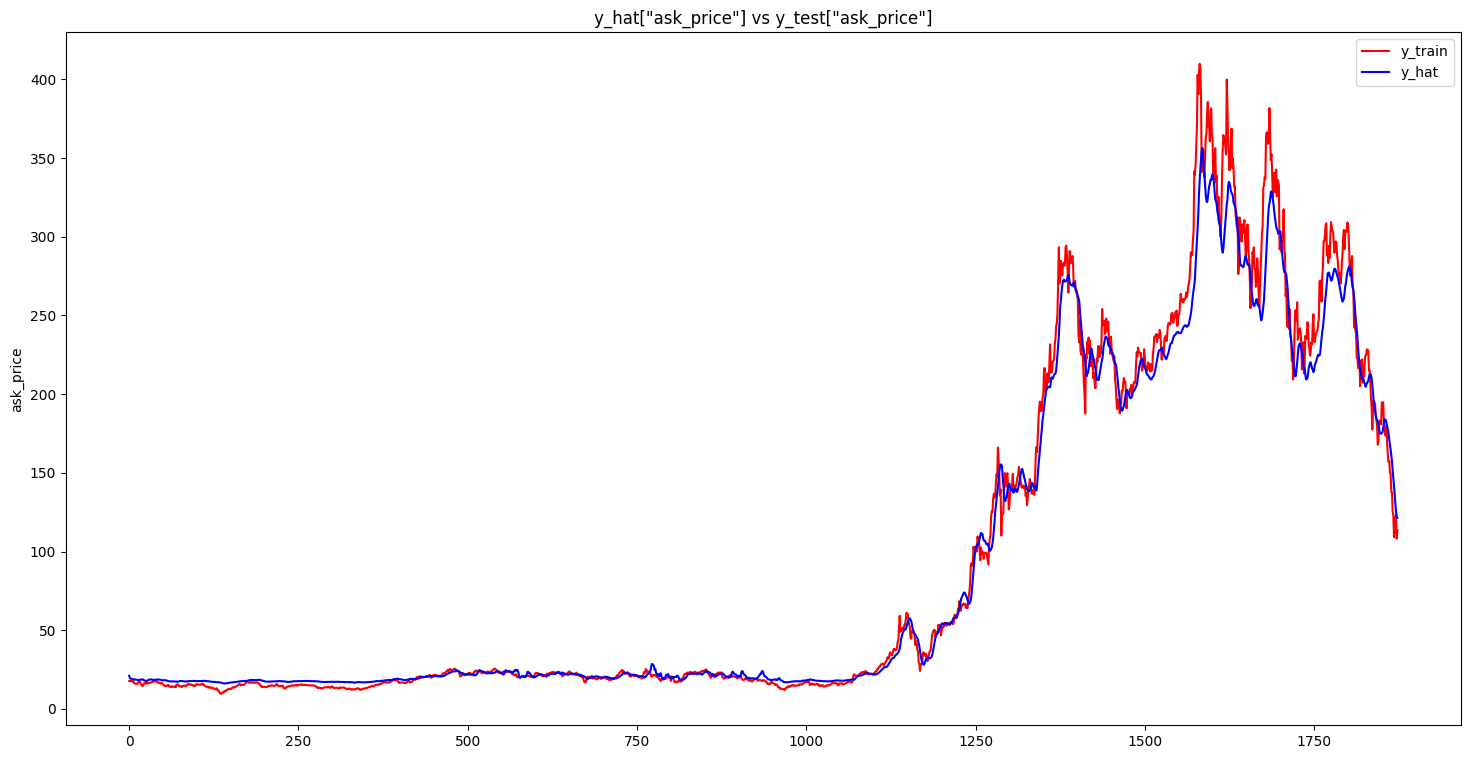

In [200]:
# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_train, color = 'red', label = 'y_train')
plt.plot(y_hat[:,0], color = 'blue', label = 'y_hat')
plt.title('y_hat["ask_price"] vs y_test["ask_price"]')
plt.ylabel('ask_price')
plt.legend()
plt.show()



In [ ]:
y_train = sc.transform(y_train)

In [ ]:
rsme = np.sqrt( np.mean( predictions - y_test )**2 )

In [2]:
from kerastuner import RandomSearch
from kerastuner import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters

2023-01-09 09:27:10.347794: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/tmp/ipykernel_47148/4099025838.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
def tune_model(hp):
    
    model = create_model(LSTM_filters=hp.Choice('filters', [32,64,128]),
                         dropout=hp.Choice('dropout', [0,0.1,0.3]),
                         recurrent_dropout=hp.Choice('recurrent_dropout', [0,0.1,0.3]),
                         dense_dropout=hp.Choice('dense_dropout', [0,0.1,0.3]),
                         activation=hp.Choice('activation', ['relu','leaky_relu']),
                         depth=hp.Choice('depth', [1,2]))
    
    return model 

"""
tuner_search = RandomSearch(tune_model,
                            objective='val_loss',
                            max_trials=5,
                            directory='.',
                            project_name="hyperparam_optimization")
"""

tuner_search = BayesianOptimization(
    hypermodel=tune_model,
    objective='val_loss',
    max_trials=20,
    num_initial_points=4,
    alpha=0.0001,
    beta=2.6,
    seed=42,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    directory='tuning_network',
    project_name="Hyperparam_BayesianOptimization",
    overwrite=True,
)

tuner_search.search(x_train,y_train,epochs=30,validation_split=0.1)

In [ ]:
tuner_search.search_space_summary()

In [ ]:
tuner_search.results_summary()

In [ ]:
best_model=tuner_search.get_best_models(num_models=1)[0]

best_model.summary()